# Lecture 5: Packages, tests, Continuous Integration
## October 15, 2019
## Tristan Glatard


# Today's objectives
1. Installing packages in Python
2. Writing tests
3. Introduce and discuss Continuous Integration


# Python packages

Python has a rich ecosystem of libraries, available on the Python Package Index ([PyPI](https://pypi.org)) and installed through the `pip` package manager. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Browse [PyPI](https://pypi.org) and look for useful libraries
* Follow the steps below to learn about two useful tools: `pip` and `virtualenv`


Today we will focus on two important libraries of the [SciPy](https://scipy.org/) ecosystem: numpy and matplotlib (some of you may already have been introduced to these libraries in Lecture 3's bonuses). Let's start by installing `numpy` using `pip`:

In [3]:
pip install numpy

You are using pip version 19.0.3, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


By default, `pip` installs packages system-wide, which requires administrative access. Depending on the privileges you have on your computer, you might need to install it in your user directories. This can be done by passing option `--user`:

In [4]:
pip install --user numpy

Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You are using pip version 19.0.3, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In most cases, it is useful to install packages in a separate, self-contained environment, to avoid conflicts. This is done using `virtualenv` (virtual environment), which also comes as a Python package:

In [10]:
pip install virtualenv

You are using pip version 19.0.3, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


We can now create a new virtual environment:

In [9]:
!virtualenv lecture5

New python executable in /home/glatard/Documents/teaching_concordia/python-cebd-1100/notebooks/lecture5/bin/python2
Also creating executable in /home/glatard/Documents/teaching_concordia/python-cebd-1100/notebooks/lecture5/bin/python
Installing setuptools, pip, wheel...done.


This installed an independent Python environment under "lecture5". Let's activate this environment:

In [14]:
! . lecture5/bin/activate # on Windows, this path would be lecture5\Scripts\activate

Packages will now be installed within this self-contained, independent environment. Let's reinstall numpy and make sure that it is accessible:

In [15]:
pip install numpy  # no need for --user this time (why?)

You are using pip version 19.0.3, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy

At any time, you can exit your virtual environment by just typing `deactivate` in a shell console.

## numpy

numpy is a useful library to manipulate multi-dimensional arrays of numbers. Here we will reuse the arthritis dataset from [Software Carpentry](https://swcarpentry.github.io/python-novice-inflammation) that we already used in Lecture 3:

In [19]:
a = numpy.loadtxt(fname='../arthritis/data/inflammation-01.csv', delimiter=',')

In [20]:
a

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

a is now a 2-dimensional array containing inflammations in patients. Numpy provides functions for most common operations on arrays, such as:

In [21]:
# Determining array dimensions
numpy.shape(a)

(60, 40)

This means that array `a` has 60 rows (patients) and 40 columns (measurements).

In [22]:
# Accessing elements
a[3][9]

7.0

This is measurement 10 of the patient 3.

In [26]:
# Summing or averaging
numpy.mean(a[0])

5.45

`numpy` can also broadcast operations to arrays:

In [33]:
a + 5 # this adds 5 to all elements in a

array([[5., 5., 6., ..., 8., 5., 5.],
       [5., 6., 7., ..., 6., 5., 6.],
       [5., 6., 6., ..., 7., 6., 6.],
       ...,
       [5., 6., 6., ..., 6., 6., 6.],
       [5., 5., 5., ..., 5., 7., 5.],
       [5., 5., 6., ..., 6., 6., 5.]])

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Using `numpy`, create a program that counts the average number of inflammations for each patient in `inflammation-01.csv`.
* Contrast your solution to the one you had written in Lecture 3: what are the benefits of using `numpy` for this task?

## Matplotlib

Matplotlib is the main plotting library in Python. You will use it to visualize data in various forms. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

To get started, let's install `matplotlib` using `pip` and verify that it is accessible:

In [30]:
pip install matplotlib

You are using pip version 19.0.3, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In its simplest form, `matplotlib` can plot an XY plot from data passed in lists or numpy arrays:

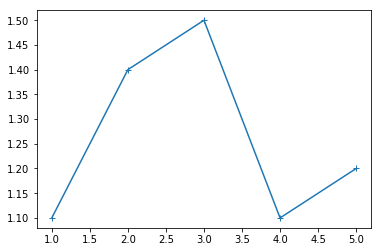

In [40]:
from matplotlib import pyplot as plt
x = [1, 2, 3, 4, 5]
y = [ 1.1, 1.4, 1.5, 1.1, 1.2 ]
plt.plot(x, y, '+-')
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Write a program that plots the inflammations of patient 7 in the arthritis dataset
* Modify your program so that the patient number is passed as an argument of your program

## Bonus(es)

Modify your program to add axis labels, to plot multiple patients (for instance the 3 patients with the highest average number of inflammations), to change colors and line styles, etc

# Tests

Software tests are currently the main tool to ensure that a program is correct. Tests simply call a program on specific data, and check that it returns the expected result.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

It's easier to test *functions* than entire programs. If you're not too comfortable with functions, it is a good time to brush up on them using the corresponding section in [Lecture 2](Lecture2.ipynb).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

In Python, tests are run with a package called `pytest`. Install `pytest` using `pip`.

In the remainder of this Lecture, we will use a template Git repository located at 
https://github.com/tgteacher/python-homework-5
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>
    
* Clone the repository on your computer

File `tests/test_analysis.py` contains 3 functions that will be used to test the 3 functions in `analysis.py`.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Run the tests using `python -m pytest`. 
* What are the result of the tests and why?

# Continuous Integratation

Continuous Integration is a process through which code is tested after every modification (Git commit). It is useful to identify when bugs are introduced in the code. Continuous Integration requires that a specific service be triggered with every commit. Here we will use [Travis-CI](https://travis-ci.org).

Travis-CI is configured by means of (1) a configuration file in a GitHub repository, called `.travis.yml`, (2) a web service. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Open and inspect `.travis.yml` in the homework repository
* Create an account on [travis-ci.org](https://travis-ci.org). It is recommended to sign-up using your GitHub account.
* Push your Git homework repository to GitHub.
* Through the web interface of Travis-CI, configure CI for your repository (see the '+' button at the top-left of the home screen):
<img width=400 src="img/travis.png"/>